In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


**Name: Adit Samir Patel<br>ASU ID: 1229560217<br>Homework: 3<br>Task: 2<br>**


In [1]:

import pandas as pd
import numpy as np
from surprise import Dataset, Reader, SVD, KNNBasic
from surprise.model_selection import cross_validate, train_test_split
import matplotlib.pyplot as plt
from surprise.accuracy import rmse, mae

In [2]:
data = pd.read_csv('/kaggle/input/the-movies-dataset/ratings_small.csv')
data.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [3]:
#checking for null values
data.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

In [4]:
reader = Reader()

In [5]:
data = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)
data

**Task 3C**

In [6]:
# Probablistic Matrix Factorization
pmf = SVD(biased=False) # PMF
pmf  = cross_validate(pmf, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)

Evaluating MAE, RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7804  0.7755  0.7739  0.7875  0.7736  0.7782  0.0052  
RMSE (testset)    1.0107  1.0060  1.0067  1.0154  1.0004  1.0078  0.0050  
Fit time          1.82    1.87    2.00    1.96    1.81    1.89    0.08    
Test time         0.12    0.12    0.27    0.12    0.12    0.15    0.06    


In [7]:
# User based Collaborative Filtering
user_cf = KNNBasic()
user_cf  = cross_validate(user_cf, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7461  0.7445  0.7443  0.7423  0.7411  0.7436  0.0018  
RMSE (testset)    0.9693  0.9677  0.9686  0.9641  0.9686  0.9677  0.0019  
Fit time          0.14    0.17    0.18    0.19    0.18    0.17    0.02    
Test time         1.73    1.64    1.69    1.71    1.87    1.73    0.08    


In [8]:
# Item based Collaborative Filtering
item_cf = KNNBasic(sim_options={'user_based': False})
item_cf  = cross_validate(item_cf, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7214  0.7214  0.7188  0.7169  0.7253  0.7208  0.0028  
RMSE (testset)    0.9380  0.9350  0.9311  0.9289  0.9407  0.9347  0.0043  
Fit time          4.94    5.00    4.72    4.79    4.75    4.84    0.11    
Test time         8.75    8.93    8.59    8.76    8.47    8.70    0.16    


**Task 3D**

In [9]:
obtained_data = [['PMF', pmf['test_mae'].mean(), pmf['test_rmse'].mean()], ['User Based CF', user_cf['test_mae'].mean(), user_cf['test_rmse'].mean()], ['Item Based CF', item_cf['test_mae'].mean(), item_cf['test_rmse'].mean()]]
result = pd.DataFrame(obtained_data, columns = ["Technique", "MAE", "RMSE"])
result

,Technique,MAE,RMSE
0,PMF,0.778178,1.007849
1,User Based CF,0.743650,0.967650
2,Item Based CF,0.720755,0.934740


**Task 3E**

In [10]:
train_data, test_data = train_test_split(data, test_size = 0.2)
user_cf_mae = []
user_cf_rmse = []

metrics = ['cosine','msd','pearson']
for i in metrics:
    if i=="cosine":
        model = KNNBasic(sim_options={'name':'cosine'})
    elif i=="msd":
        model = KNNBasic(sim_options={'name':'msd'})
    else:
        model = KNNBasic(sim_options={'name':'pearson'})
    model.fit(train_data)
    user_cf_mae.append(mae(model.test(test_data)))
    user_cf_rmse.append(rmse(model.test(test_data)))
    

print(user_cf_mae)
print(user_cf_rmse)

Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE:  0.7607
RMSE: 0.9852
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7358
RMSE: 0.9589
Computing the pearson similarity matrix...
Done computing similarity matrix.
MAE:  0.7653
RMSE: 0.9899
[0.7607013125299092, 0.7357844005568709, 0.7652823163249702]
[0.9851532551130342, 0.9588840099159583, 0.9898819088800649]


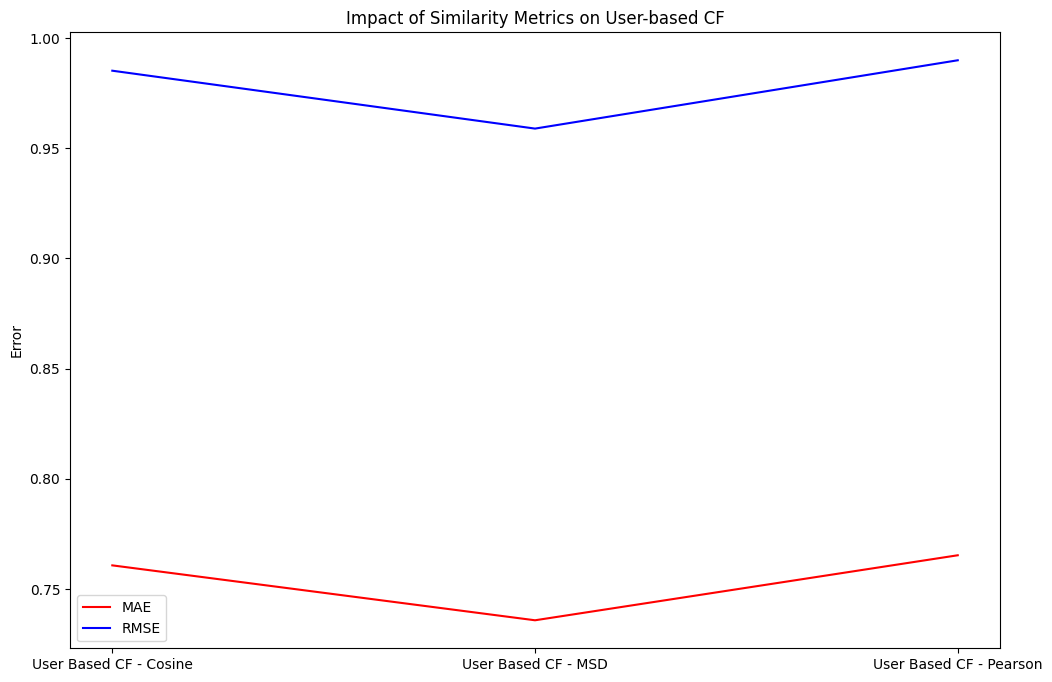

In [11]:
graph_metrics = ["User Based CF - Cosine", "User Based CF - MSD", "User Based CF - Pearson"]
plt.figure(figsize=(12, 8))
plt.plot(graph_metrics, user_cf_mae, color = 'r', label='MAE')
plt.plot(graph_metrics, user_cf_rmse, color = 'b', label='RMSE')
plt.legend()
plt.title('Impact of Similarity Metrics on User-based CF')
plt.ylabel('Error')
plt.show()

In [12]:
item_cf_mae = []
item_cf_rmse = []

metrics = ['cosine','msd','pearson']
for i in metrics:
    if i=="cosine":
        model = KNNBasic(sim_options={'name':'cosine', 'user_based': False})
    elif i=="msd":
        model = KNNBasic(sim_options={'name':'msd', 'user_based': False})
    else:
        model = KNNBasic(sim_options={'name':'pearson', 'user_based': False})
    model.fit(train_data)
    item_cf_mae.append(mae(model.test(test_data)))
    item_cf_rmse.append(rmse(model.test(test_data)))
    

print(item_cf_mae)
print(item_cf_rmse)

Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE:  0.7676
RMSE: 0.9855
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7133
RMSE: 0.9238
Computing the pearson similarity matrix...
Done computing similarity matrix.
MAE:  0.7587
RMSE: 0.9780
[0.7675556788257689, 0.7132657855493021, 0.7586553380627999]
[0.9854544219274041, 0.9238249079303991, 0.978018967619573]


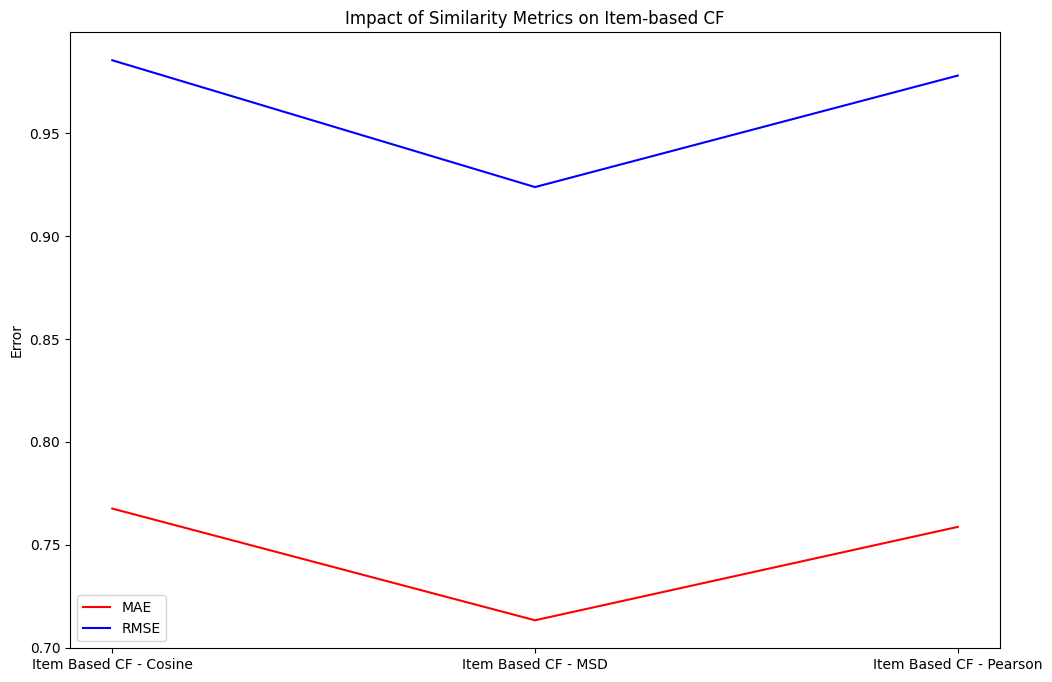

In [13]:
graph_metrics = ["Item Based CF - Cosine", "Item Based CF - MSD", "Item Based CF - Pearson"]
plt.figure(figsize=(12, 8))
plt.plot(graph_metrics, item_cf_mae, color = 'r', label='MAE')
plt.plot(graph_metrics, item_cf_rmse, color = 'b', label='RMSE')
plt.legend()
plt.title('Impact of Similarity Metrics on Item-based CF')
plt.ylabel('Error')
plt.show()

**Task 3F**


In [14]:
neighbour_values = [5,10,15,20,25,30]
user_cf_mae = []
user_cf_rmse = []

for neighbour in neighbour_values:
    model = KNNBasic(k=neighbour)
    model.fit(train_data)
    user_cf_mae.append(mae(model.test(test_data)))
    user_cf_rmse.append(rmse(model.test(test_data)))
    
print(user_cf_mae)
print(user_cf_rmse)

Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7491
RMSE: 0.9793
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7309
RMSE: 0.9568
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7289
RMSE: 0.9534
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7304
RMSE: 0.9543
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7316
RMSE: 0.9553
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7331
RMSE: 0.9566
[0.7490870007337203, 0.7308923635558439, 0.7289088271823121, 0.7304000572469282, 0.73156202850818, 0.7331451998134002]
[0.9793133643022837, 0.9567884879134678, 0.9534124078177453, 0.954270027399247, 0.9553345025595258, 0.9566443621837418]


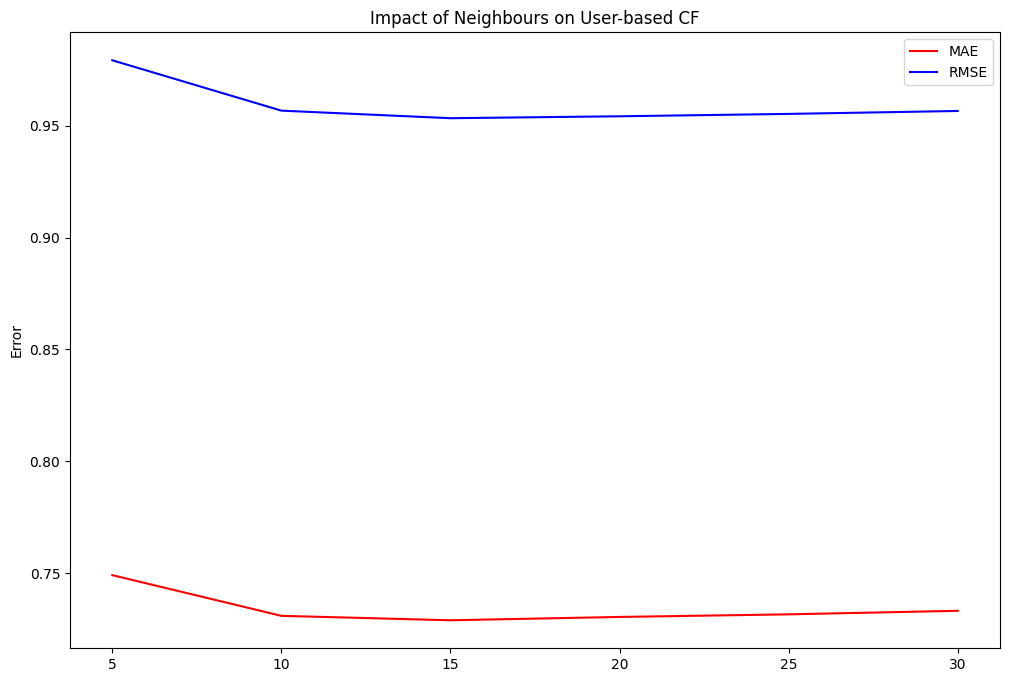

In [15]:
plt.figure(figsize=(12, 8))
plt.plot(neighbour_values, user_cf_mae, color = 'r', label='MAE')
plt.plot(neighbour_values, user_cf_rmse, color = 'b', label='RMSE')
plt.legend()
plt.title('Impact of Neighbours on User-based CF')
plt.ylabel('Error')
plt.show()

In [16]:
item_cf_mae = []
item_cf_rmse = []

for neighbour in neighbour_values:
    model = KNNBasic(k=neighbour, sim_options={'user_based':False})
    model.fit(train_data)
    item_cf_mae.append(mae(model.test(test_data)))
    item_cf_rmse.append(rmse(model.test(test_data)))
    
print(item_cf_mae)
print(item_cf_rmse)

Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7859
RMSE: 1.0152
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7476
RMSE: 0.9656
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7325
RMSE: 0.9465
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7250
RMSE: 0.9371
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7205
RMSE: 0.9312
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7170
RMSE: 0.9277
[0.7859224498146068, 0.7476446059485766, 0.7324605534258211, 0.7250226316207118, 0.7204765938506522, 0.7169714747672378]
[1.0152075824084243, 0.9656037885350671, 0.9465004605340768, 0.9371315105709773, 0.9312125266653563, 0.9277121269619031]


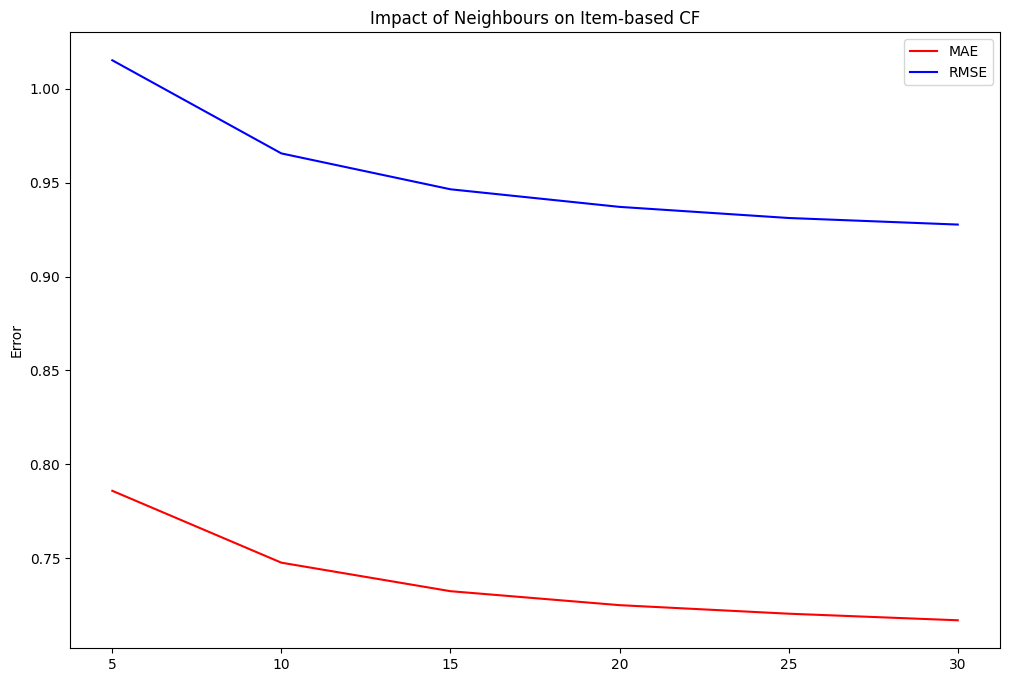

In [17]:
plt.figure(figsize=(12, 8))
plt.plot(neighbour_values, item_cf_mae, color = 'r', label='MAE')
plt.plot(neighbour_values, item_cf_rmse, color = 'b', label='RMSE')
plt.legend()
plt.title('Impact of Neighbours on Item-based CF')
plt.ylabel('Error')
plt.show()

**Task 3G**

In [18]:
user_cf_rmse = []

for i in range(1,31):
    model = KNNBasic(k=i)
    model.fit(train_data)
    user_cf_rmse.append(rmse(model.test(test_data)))


best_user_cf_k = user_cf_rmse.index(min(user_cf_rmse)) + 1
print("The best Value of K for User Base CF: ", best_user_cf_k)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.1940
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0600
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0139
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9905
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9793
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9697
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9644
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9610
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9580
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9568
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9559
Computing the msd similarity matrix...
Done computing 

In [20]:
item_cf_rmse = []

for i in range(1,31):
    model = KNNBasic(k=i, sim_options={'user_based':False})
    model.fit(train_data)
    item_cf_rmse.append(rmse(model.test(test_data)))


best_item_cf_k = item_cf_rmse.index(min(item_cf_rmse)) + 1
print("The best Value of K for Item Base CF: ", best_item_cf_k)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.2974
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.1354
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0716
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0373
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0152
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9985
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9880
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9794
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9720
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9656
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9605
Computing the msd similarity matrix...
Done computing 